# Exercise: Enron Ensembles

In this exercise we will practice using ensemble methods to build a spam filter trained on the Enron email dataset.

The [Enron Corporation](https://en.wikipedia.org/wiki/Enron) was an energy company active between 1985 and 2004, famous for being investigated for accounting fraud in the "Enron scandal" of 2001. As part of the investigation, the United States Federal Energy Regulatory Commission obtained and published about 500,000 of the company's internal emails. The "silver lining" of the scandal was that this provided NLP researchers working on emails with a convenient dataset.


We will use this data to train a spam filter, using a processed version of the Enron dataset including labels for "ham" (non-spam) and spam emails, provided by the [NLP group at the Athens University of Economics and Business](http://nlp.cs.aueb.gr/software.html) (AUEB). We will compare boosting and bagging and examine how they are applied to this problem.

**Note:** This problem requires scikit-learn version 0.21 or above. Verify that this is installed before proceeding.

## Part 1: Data preprocessing

### Questions
1. Load the accompanying data file `enron.csv.gz` as a Pandas dataframe (use the `compression` attribute of `pandas.read_csv()`). Print out a random ham and spam full email in a readable format.

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [2]:
# your code here
df = pd.read_csv('enron.csv.gz', compression = 'infer')

ham email :

In [3]:
print(df[df.label == 'ham'].sample().text.values[0])

Subject: caiso notice - pwc operational study
iso market participants :
in past years , the california independent system operator ( iso ) has
evaluated its operating practices through an independent review .
 ( pwc ) plans to commence the iso ' s 2001 operational
study during september 2001 . as in past years , the operational study will be
focused on hour - ahead , day - ahead and real - time operating practices performed
by iso personnel in its folsom and alhambra control rooms .
pwc is seeking input from iso market participants prior to conducting its
operational study . consistent with prior studies , the scope of the 2001
operational study will not include active settlement disputes which are
being addressed in other forums .
if you would like to meet with pwc ( via conference call ) to discuss the
scope of this operational study , please call ms . ericia berti at ( 916 )
351 - 4453 or e - mail her at eberti @ caiso . com . you
can schedule a meeting for wednesday , september 5 t

spam email :

In [4]:
print(df[df.label == 'spam'].sample().text.values[0])

Subject: perfect logo charset = koi 8 - r " >
thinking of breathing new life into your business ?
start from revamping its front - end - logo and visuai identity .
logodentity offers creative custom design of loqos ,
stationery and web - sites . under our carefui hand these powerful marketinq tools
wili bring a breath of fresh air into your business
and make you stand out among the competitors .
you are just a click
away from your future success . click here to see the sampies of our artwork ,
check our prices and hot offers


2. What words do you think would be more common in ham emails? What about in spam emails? Give a few examples.

common words in ham emails : time landscape like 'yesterday','tomorrow',proper noun like the name of the sender or the receiver, nice way to end the email like 'kind regards'.

common words in spam emails : 'money',some links, many numbers, 'click here', 'visit'

3. How does it look like the text of the emails has been preprocessed by AUEB?

It looks like all the capital letters have been removed from the text and line break too.

4. Find the most common 20 words in ham emails and the most common 20 words in spam emails. (Hint: use `collections.Counter` and **Pandas** `str.split()`.  No additional preprocessing is necessary, and in this context, a word could be a punctuation sign). What do you notice about these words?

In [5]:
# your code here
counter_ham = Counter(df[df.label == 'ham'].text.str.cat().split())

In [6]:
counter_ham.most_common(20)

[('-', 338915),
 ('.', 295386),
 (',', 245997),
 ('the', 195851),
 ('/', 143227),
 ('to', 140642),
 (':', 122935),
 ('and', 90980),
 ('of', 83277),
 ('a', 70221),
 ('enron', 65702),
 ('in', 65004),
 ("'", 58812),
 ('for', 54466),
 ('@', 45874),
 ('on', 45252),
 ('ect', 43127),
 ('is', 41457),
 ('i', 41116),
 (')', 38823)]

In [7]:
counter_spam = Counter(df[df.label == 'spam'].text.str.cat().split())

In [8]:
counter_spam.most_common(20)

[('.', 296195),
 (',', 186396),
 ('the', 132579),
 ('-', 124775),
 ('to', 105073),
 ('_', 91995),
 ('and', 91312),
 ('of', 86029),
 (':', 66229),
 ('a', 65387),
 ('you', 60994),
 ('in', 56259),
 ('/', 53413),
 ('your', 44615),
 ('for', 43254),
 ('this', 42460),
 ('is', 41361),
 ('!', 40234),
 ('$', 30214),
 ("'", 29071)]

Most of the words from ham emails are punctuation sign.

On spam emails, we have the dollar sign as one of the most common words. We also notice that we have a lot of pronoun like 'your','you' so spam emails are written in a more direct way to designate the receiver directly.

5. Convert the labels (ham/spam) to a numeric vector y, with entries 0 for ham emails and 1 for spam emails. (Hint: `y.shape` should be (38891,). You might use `pandas.Series.map`)

In [9]:
# your code here
y = (df.label == 'spam').astype(int)

In [10]:
y.shape

(38891,)

6. Convert the text of emails to a feature matrix X whose rows are "bag of words" feature vectors using `sklearn.feature_extraction.text.CountVectorizer`, with `max_features=500`, `stop_words='english'`. (Hint: `X.shape` should be (38891, 500)).

In [11]:
# your code here
vectorizer = CountVectorizer(max_features = 500, stop_words = 'english')
X = vectorizer.fit_transform(df.text)

In [12]:
X.shape

(38891, 500)

7. Look at the first row of `X` (`X[0, :].toarray()`). What do you think each number represents? Use the `CountVectorizer`'s `cv.get_feature_names()` or `cv.vocabulary_` to confirm your guess.  What's the most common word in the first email, what column number is it, and how many times does it appear in the email?

In [13]:
# your code here
fs_row = X[0,:].toarray()
fs_row

array([[0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 8, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0,
        0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 5, 0, 0, 0, 0, 0, 0, 0, 9, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 7, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Each number represent the occurences of the 500 most common words on the text of the first row.

In [14]:
features = vectorizer.get_feature_names_out()
features

array(['00', '000', '01', '02', '03', '04', '05', '06', '07', '08', '09',
       '10', '100', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '2000', '2001', '2002', '2004', '2005', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '35', '40', '45',
       '50', '500', '60', '70', '713', '75', '80', '90', '95', '97', '99',
       'able', 'access', 'account', 'accounting', 'act', 'action',
       'additional', 'address', 'adobe', 'advice', 'agreement', 'america',
       'analyst', 'approved', 'april', 'assets', 'attached', 'august',
       'available', 'bank', 'based', 'believe', 'best', 'better', 'big',
       'billion', 'board', 'bob', 'book', 'business', 'buy', 'california',
       'canada', 'capacity', 'capital', 'case', 'cash', 'cc', 'center',
       'ceo', 'certain', 'chairman', 'change', 'changes', 'check',
       'chief', 'click', 'close', 'com', 'come', 'commercial',
       'commission', 'communications', 'companies', 'company', 'comple

In [15]:
assert df.iloc[0].text.count('04') == 1

In [16]:
assert df.iloc[0].text.count('05') == 2

In [17]:
features[fs_row.argmax()]

'ena'

The most common word on the first email is 'ena'.

In [18]:
fs_row.argmax()

163

It corresponds to the column 163.

In [19]:
fs_row.max()

9

It appears 9 times in the email.

8. (bonus) Use PCA with two components (`sklearn.decomposition.PCA`) to project X into two dimensions. Make a scatterplot of X values with different colors for ham and spam emails. Does it look like the features in X will be useful for identifying spam?

In [20]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 4, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [21]:
# your code here
from sklearn.decomposition import PCA
n_components = 2
pca = PCA(n_components = n_components)
pca_data = pca.fit_transform(X.toarray())

In [22]:
pca_data.shape,y.shape

((38891, 2), (38891,))

In [23]:
pca_data[y[y==0].sample(50).index][:,0]

array([-2.22053318e+00, -1.62079044e+00, -1.20743297e+00,  4.56505154e+01,
       -2.49504534e+00, -2.15966186e+00, -7.91605699e-02, -1.07313610e-01,
        8.33824007e+00,  8.37447762e-01,  8.47145171e+00, -2.51716846e+00,
       -5.48501154e-01, -8.29603790e-01,  4.11055995e+00,  2.94717931e-02,
       -1.78961917e+00,  1.03728096e+00, -6.13195122e-01, -2.36530373e+00,
       -1.83927813e+00, -2.41630110e+00, -1.99924134e+00, -2.39535051e+00,
        2.75671423e+00, -6.86467216e-02, -1.43765628e-01, -2.28413980e+00,
       -2.54904753e+00,  5.47751958e+01,  1.26624232e+02, -1.99782475e+00,
       -5.18838414e-01, -1.30768650e+00, -5.54570093e-01, -1.91200565e+00,
       -1.40709324e+00, -1.44663161e+00,  5.72994873e+00, -7.32787731e-01,
       -1.37061429e+00,  5.74264738e+00, -2.37842205e+00, -1.55184486e+00,
       -1.14568880e+00, -1.65259602e+00,  7.47556617e-02, -2.32078782e+00,
       -1.49351660e+00,  1.34565370e+01])

In [24]:
y[y==0].sample(50).index

Int64Index([ 6321,  7959,  7348,  1938, 17627, 11255, 13318,  6929, 11251,
            13355, 13245, 11645, 15052,  3314,  2330,  9428,  6171,   477,
            15138,  2143, 11518, 17461,  6427,  3630,  6005, 10095,  9636,
            12160, 15839,  1149,  7714, 13927,  9851, 17907, 13874, 10383,
            11247,  8613, 12340,  7353,  5008, 10220, 15954, 14552,  3098,
             9451,  1883,  1260,  7526,  1099],
           dtype='int64')

In [25]:
pca_data[:,1].mean()

3.2740031947805393e-16

(-3.0, 1.0)

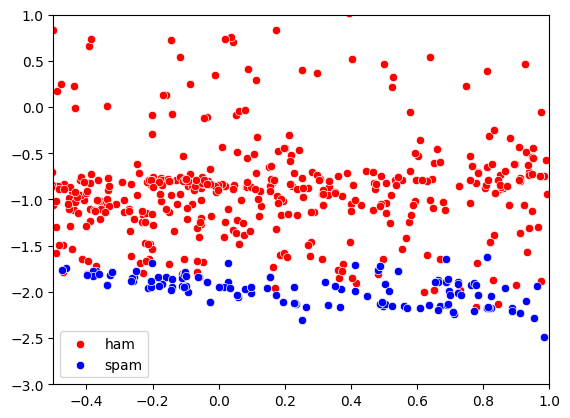

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
indexes_ham = y[y==0].sample(5000).index
indexes_spam = y[y==1].sample(5000).index
f = plt.figure()
sns.scatterplot(x = pca_data[indexes_ham][:,0], y = pca_data[indexes_ham][:,1], color = 'red', label = 'ham')
sns.scatterplot(x = pca_data[indexes_spam][:,0], y = pca_data[indexes_spam][:,1], color = 'blue', label = 'spam')
plt.legend()
plt.xlim(-0.5,1)
plt.ylim(-3,1)

We see that spam values in X are not very spreaded. Variance is low so it will be difficult to get relevant informations from X for spam emails.

9. Split X and y into train and test sets using `sklearn.model_selection.train_test_split`. Use 80% of the data for training.

In [28]:
# your code here
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

## Part 2: Boosting

### Questions:

10. Train an AdaBoost classifier (`sklearn.ensemble.AdaBoostClassifier`, using `algorithm='SAMME'`) using the default base estimator of decision trees of depth one on your training data. Choose whatever number of estimators seems reasonable - giving us a better metric, but not taking too long. What accuracy, precision, and recall does this give on the test data?

In [29]:
# your code here
n_estimators = [10,30,50,70,90]
best_acc = 0
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
for n_estimator in n_estimators:
  ada = AdaBoostClassifier(algorithm = 'SAMME', n_estimators = n_estimator)
  ada.fit(X,y)
  y_pred_ada = ada.predict(X_test)
  acc = accuracy_score(y_test,y_pred_ada)
  if acc > best_acc :
    best_acc = acc
    best_n_estimators = n_estimator



In [30]:
best_n_estimators

90

In [31]:
from sklearn.metrics import classification_report
ada = AdaBoostClassifier(algorithm = 'SAMME', n_estimators = best_n_estimators)
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91      3590
           1       0.88      0.99      0.93      4189

    accuracy                           0.92      7779
   macro avg       0.93      0.91      0.92      7779
weighted avg       0.93      0.92      0.92      7779



We get an accuracy of 0.92

class 0 : we get a precision of 0.98 and a recall of 0.84

class 1 : we get a precision of 0.88 and a recall of 0.99

11. Which 10 words are most important for knowing if an email is spam? (Hint: use `AdaBoostClassifier.feature_importances_` and `argsort()`) Do these make sense to you?

In [32]:
# your code here
indexes_words = ada.feature_importances_.argsort()[::-1][:10]

In [33]:
features[indexes_words]

array(['enron', '2001', '2000', 'attached', 'vince', 'louise', '2005',
       'http', 'questions', 'cc'], dtype=object)

It makes sense as we know that on spam emails we often have links. 'http' is refering to it. We also have many numbers and often some documents. '2001",'2000','2005','http' is refering to it.

12. Use `AdaBostClassifier.estimators_`, `AdaBoostClassifier.estimator_weights_`, and `sklearn.tree.plot_tree` to plot the three most important decision trees in the ensemble. Would each decision tree alone overfit or underfit? (Hint: in `plot_tree` use the attributes `filled=True`, `proportion=True`, `class_names=['ham', 'spam']`, `feature_names=[array of words]`, and set fontsize so that the output is legible.)

In [34]:
len(features)

500

In [35]:
# your code here
indexes = ada.estimator_weights_.argsort()[::-1][:3]

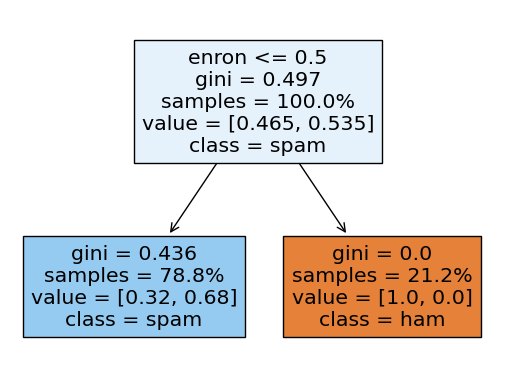

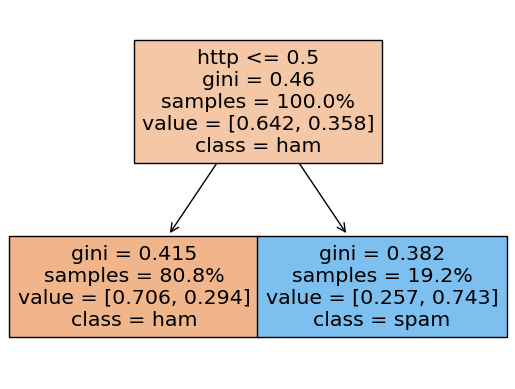

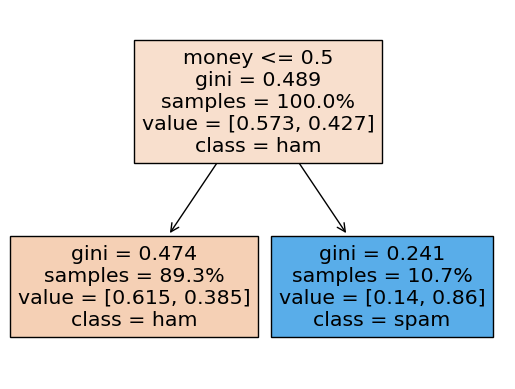

In [36]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
for index in indexes:
  f = plt.figure()
  plot_tree(ada.estimators_[index], filled = True, proportion = True, class_names = ['ham','spam'], feature_names = features)

Alone, each decision tree underfit our data.

## Part 3: Bagging

### Questions:
13. Train a Random Forest classifier (`sklearn.ensemble.RandomForestClassifier`) on the training data. Choose whatever number of estimators seems reasonable - giving us a better metric, but not taking too long. What accuracy, precision, and recall does this give on the test data?

In [37]:
# your code here
from sklearn.ensemble import RandomForestClassifier
n_estimators = [10,20,30,40,50]
best_acc = 0
for n_estimator in n_estimators:
  rfc = RandomForestClassifier(n_estimators = n_estimator)
  rfc.fit(X_train,y_train)
  y_pred_rfc = rfc.predict(X_test)
  acc = accuracy_score(y_pred_rfc,y_test)
  if best_acc < acc:
    best_acc = acc
    best_n_estimator = n_estimator


In [38]:
best_n_estimator

40

In [39]:
rfc = RandomForestClassifier(n_estimators = best_n_estimator)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3590
           1       0.98      0.99      0.98      4189

    accuracy                           0.98      7779
   macro avg       0.98      0.98      0.98      7779
weighted avg       0.98      0.98      0.98      7779



We get an accuracy of 0.98

class 0 : precision = 0.99, recall = 0.97

class 1 : precision = 0.97, recall = 0.99

14. Which 10 words are most important for knowing if an email is spam? (Hint: use `RandomForestClassifier.feature_importances_` and `argsort()`) Do these make sense to you?

In [40]:
# your code here
indexes_rfc = rfc.feature_importances_.argsort()[::-1][:10]
features[indexes_rfc]

array(['enron', 'thanks', 'attached', 'pm', '2001', 'cc', 'houston',
       'louise', 'http', 'gas'], dtype=object)

we get quite the same results as the AdaBoostClassifier.
As said before, it makes sense.

15. Plot any one decision tree from the ensemble, using plot_tree. Use `max_depth` to limit the output. Do you think this tree alone would overfit or underfit new data?

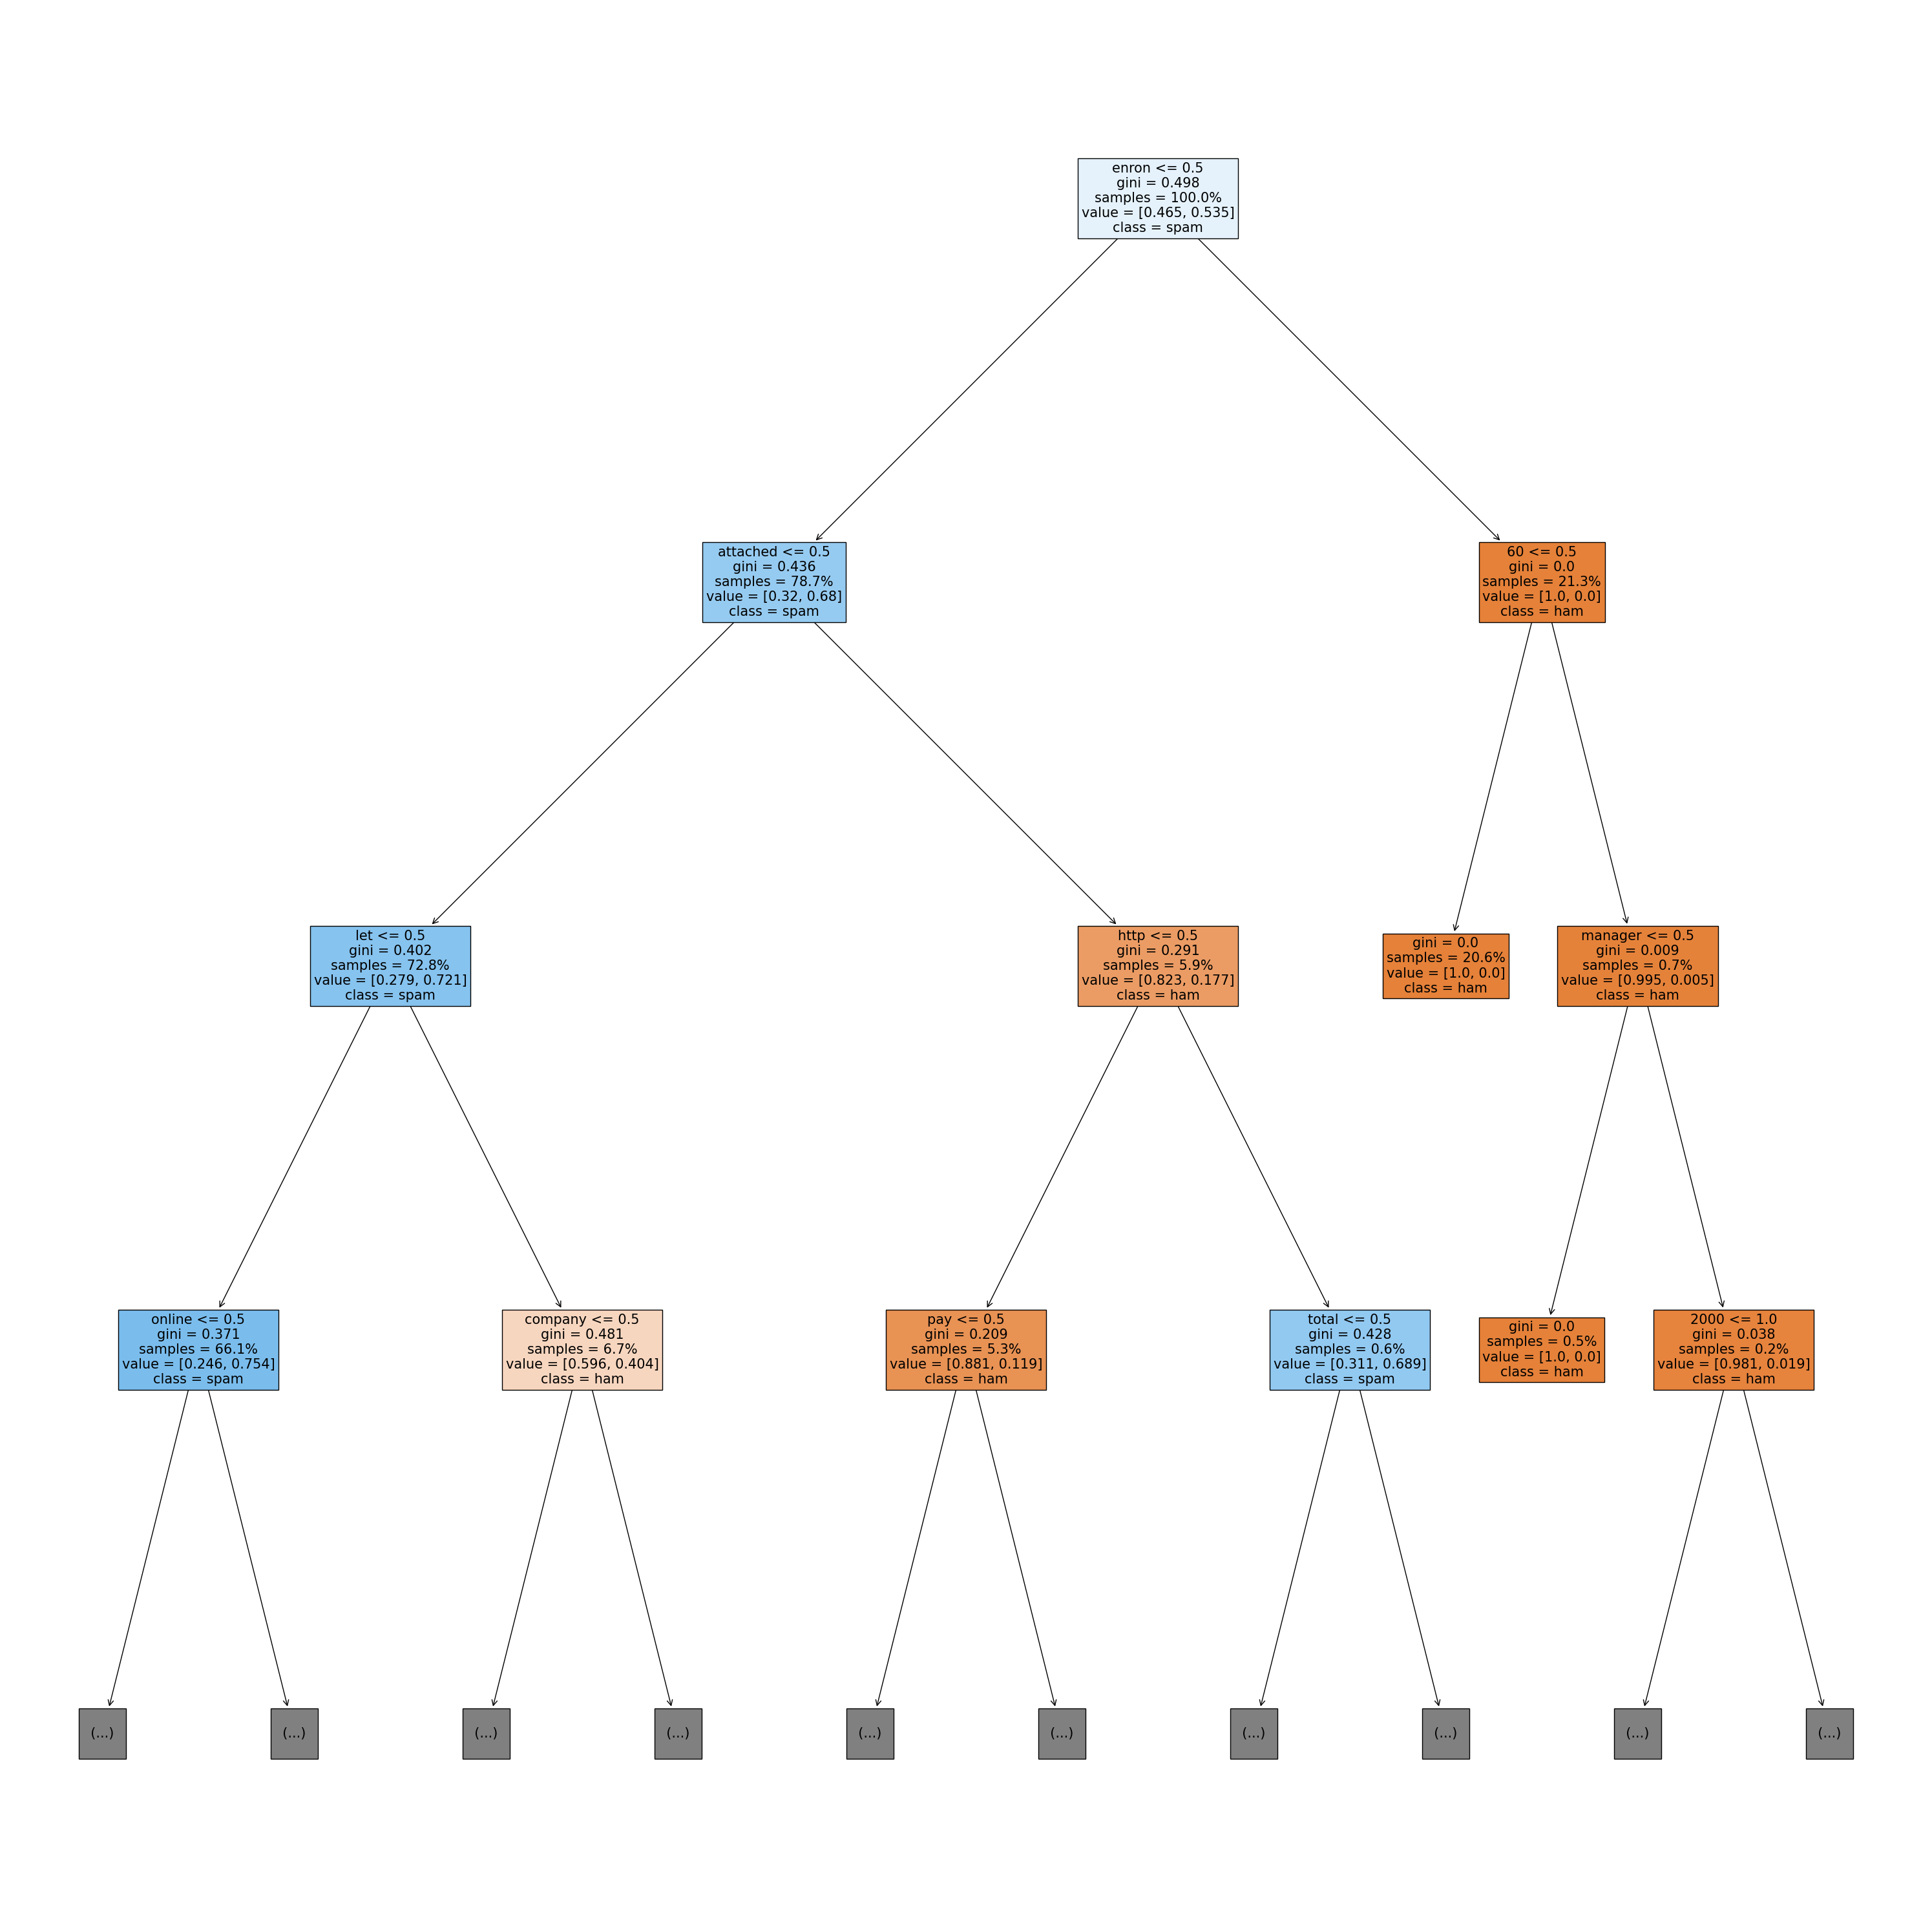

In [41]:
# your code here
f = plt.figure(figsize = (30,30))
plot_tree(rfc.estimators_[0],max_depth = 3,filled = True, proportion = True, class_names = ['ham','spam'], feature_names = features, fontsize = 15)
plt.tight_layout()
plt.show()

Alone, this tree would overfit the data.

## Part 4: Analysis

### Question:

16. Which of the two classifiers that we tested would you prefer for a spam filter, and why?

Based on the result we got on the classification report, we would prefer to use the RandomForestClassifier for a spam filter.
Moreover, RandomForest looks less computationally heavy.